# Data Analysis

## Pandas - Datasets

Pandas is a high-level data manipulation tool. Its key data structure is called a DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

[This](https://pandas.pydata.org/pandas-docs/stable/index.html) is a link to the Pandas documentation.

## Imports

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading a dataset from a csv (in DSX)

Auto-generate code by ... 

If you were working in your own local environment, uncomment the cell below and run it.

In [20]:
simple_df = pd.read_csv('simple data.csv')
print(simple_df.head())

   group   samples    double  measured
0      1  0.899117  1.798234  1.822831
1      1  0.642620  1.285241  1.358457
2      1  0.799750  1.599499  1.560856
3      1  0.354839  0.709678  0.752218
4      1  0.327910  0.655821  0.615724


In [37]:
group_dict = {"group": [1, 2],
       "name": ['Group 1', 'Group 2']}

group_name_df = pd.DataFrame(group_dict)
group_name_df.head()

,group,name
0,1,Group 1
1,2,Group 2


## Working with data

### Creating a column

We can refer to a particular column using dataframe['column name']. This method of indexing is consistent with indexing lists and dictionaries. 

Using dataframe['column name'] on the left side of the "=" creates a new column or overwrite a column. Using dataframe['column name'] on the right side of the "=" allows you to refer to an existing column.

In [21]:
simple_df['half'] = simple_df['samples'] <= 0.5
simple_df['samples+10'] = simple_df['samples'] + 10


simple_df.head()

,group,samples,double,measured,half,samples+10
0,1,0.899117,1.798234,1.822831,False,10.899117
1,1,0.642620,1.285241,1.358457,False,10.642620
2,1,0.799750,1.599499,1.560856,False,10.799750
3,1,0.354839,0.709678,0.752218,True,10.354839
4,1,0.327910,0.655821,0.615724,True,10.327910


### Selecting data

Similar to referring to a particular column, you can refer to a list of columns. Generally you can do this with dataframe[[list of column names]]. This can be used to "keep" only the list of columns.

If you would rather just drop a smaller set of columns that's also possible. 

If you want to filter out rows you can do that using .loc[] i.e. dataframe.loc[condition]. You can combine multiple conditions together using & and | operators. You can filter columns and rows in the same operation using the .loc[] i.e. dataframe.loc[condition, [list of columns]].

In [32]:
simple_test_df = simple_df[['group', 'half', 'samples', 'measured']]
simple_test_df.head()

,group,half,samples,measured
0,1,False,0.899117,1.822831
1,1,False,0.642620,1.358457
2,1,False,0.799750,1.560856
3,1,True,0.354839,0.752218
4,1,True,0.327910,0.615724


In [33]:
simple_10_df = simple_df.drop(['samples', 'double', 'half'], axis=1)
simple_10_df.head()

,group,measured,samples+10
0,1,1.822831,10.899117
1,1,1.358457,10.642620
2,1,1.560856,10.799750
3,1,0.752218,10.354839
4,1,0.615724,10.327910


In [34]:
simple_half_df = simple_df.loc[simple_df['half'] == True]
simple_half_df.head()

,group,samples,double,measured,half,samples+10
3,1,0.354839,0.709678,0.752218,True,10.354839
4,1,0.327910,0.655821,0.615724,True,10.327910
6,1,0.164119,0.328237,0.304313,True,10.164119
9,1,0.377106,0.754213,0.687244,True,10.377106
10,1,0.037807,0.075615,0.081660,True,10.037807


In [35]:
simple_test_half_df = simple_df.loc[simple_df['half'] == True, ['group', 'samples', 'measured']]
simple_test_half_df.head()

,group,samples,measured
3,1,0.354839,0.752218
4,1,0.327910,0.615724
6,1,0.164119,0.304313
9,1,0.377106,0.687244
10,1,0.037807,0.081660


### Joining a dataset

The basic strategy for joining datasets is to set the index of the datasets to same columns. You can then join two dataframes using the join function. Using the optional parameters of the join function you can choose between outer, left, right, and inner joins. If the index was already set you could just use:

```python
joined_df = left_df.join(right_df)
```

In [38]:
join_df = simple_test_df.join(group_name_df.set_index('group'), on='group')
join_df.head()

,group,half,samples,measured,name
0,1,False,0.899117,1.822831,Group 1
1,1,False,0.642620,1.358457,Group 1
2,1,False,0.799750,1.560856,Group 1
3,1,True,0.354839,0.752218,Group 1
4,1,True,0.327910,0.615724,Group 1


### Group-by and statistics

The basic strategy for aggregating and getting group statistics is to use the groupby function by passing it a list of the variables that will make up the group.

You can then call various functions such as sum(), mean(), etc. that will will calculate the aggregate for the group. Alternatively you can use the agg() function by passing it a dictionary where the keys are the variables you want aggregate statistics of, and the values are a string or list of strings of the different functions you want to aggregate with.

The groupby() function's level= parameter is useful for merging a more detailed value to a more aggregated value and calculating things based on that.

In [31]:
group_df = join_df.groupby(['name']).mean()
group_df.head()

,group,samples,measured
name,,,
Group 1,1,0.439843,0.871023
Group 2,2,0.544206,1.205506


In [41]:
group_df2 = join_df.groupby(['group', 'half']).agg({'samples': 'mean', 'measured': ['mean', 'min', 'max', 'std']})
group_df2.head()

samples  measured                              
                 mean      mean       min       max       std
group half                                                   
1     False  0.775310  1.548413  0.999779  1.994720  0.288288
      True   0.203491  0.393771 -0.056920  0.912984  0.283018
2     False  0.772493  1.707720  1.097274  2.188951  0.353360
      True   0.220185  0.492687 -0.077870  1.158557  0.388527

### Pivoting and transposing data

Pivoting and transposing lets you manipulate or summarize some of the data making it easier to understand.

In [44]:
pivot_df =  join_df.groupby(['group', 'half']).agg({'measured': 'mean'}).reset_index()


pivot_df = pivot_df.pivot(index='group', columns='half', values='measured')
pivot_df.head()

half,False,True
group,,
1,1.548413,0.393771
2,1.707720,0.492687


## Plotting

Plotting is another way of visualizing the data. Pandas provide some ways to plot the data. It depends on the matplotlib library which provides a set of plotting functions that have a similar syntax to Matlab's plotting functions. Seaborn is a Python library that provides some useful plotting functions and some functionality around generating 'prettier' plots.

### Bar graphs

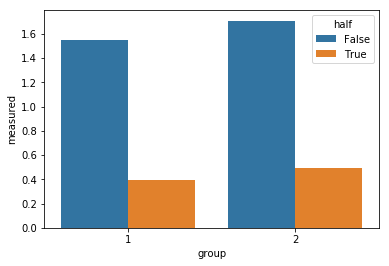

In [49]:
bar_graph_df = join_df.groupby(['group', 'half']).mean().reset_index()

ax = sns.barplot(x="group", 
                 y="measured", 
                 hue='half', 
                 data=bar_graph_df)
plt.show()

### Scatter plots

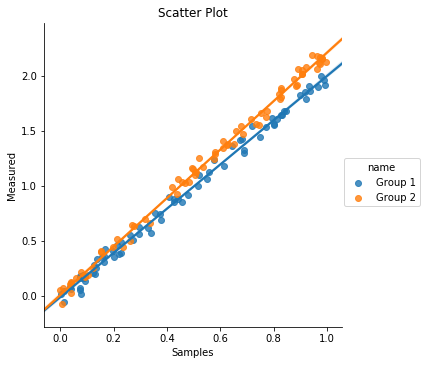

In [53]:
sns.lmplot('samples', # Horizontal axis
           'measured', # Vertical axis
           data=join_df, # Data source
           fit_reg=True, # Don't fix a regression line
           hue='name') # Set color

# Set title
plt.title('Scatter Plot')

# Set x-axis label
plt.xlabel('Samples')

# Set y-axis label
plt.ylabel('Measured')

plt.show()

### Pair-plots

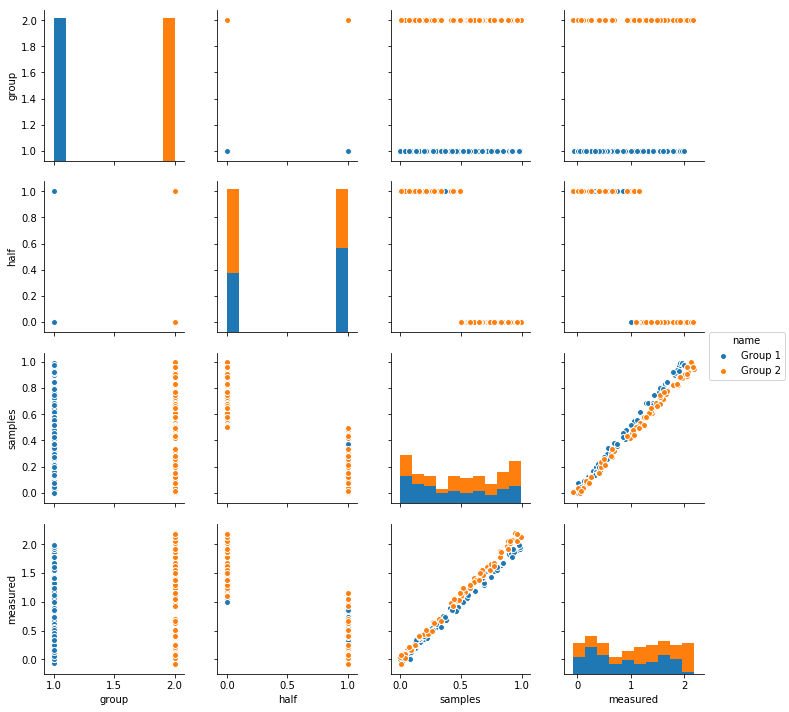

In [54]:
sns.pairplot(join_df, hue="name")
plt.show()